# Working with files and directories

In [1]:
import pathlib # manipulate paths
import glob 
import shutil

In [2]:
current_path = pathlib.Path()
current_path

PosixPath('.')

In [ ]:
# join path is easy
sample_data_path = current_path/'sample_data'

In [ ]:
sample_data_path

PosixPath('sample_data')

In [ ]:
# create new folder
train_path = sample_data_path/'train'
train_path.mkdir()
test_path = sample_data_path/'test'
test_path.mkdir()

In [ ]:
# create new file
(test_path/'file1.txt').touch()

In [ ]:
# convert to string to use as usual
str(test_path)

'sample_data/test'

# Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Mounted at /content/gdrive


In [4]:
def acc_loss_graph(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()
  plt.title('Training and validation accuracy')

  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'r', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

## GET AND ORGANIZE DATA

### Download Kaggle dataset straight to Google Drive


Normally, we have to first manually download dataset from Kaggle, then upload it to Colab or Google Drive. It takes a lot of time, especially for big datasets because the uploading speed is usually much slower than downloading. 

In this tutorial, I will show you how to download Kaggle dataset straight to Google Drive!

*Remember that if uploading to Colab, you will lose it whenever Colab is closed.*



**STEP 1: GET API KEY FROM YOUR ACCOUNT**

Visit [www.kaggle.com](http://www.kaggle.com/) ⇨ login ⇨ Account ⇨ Create New API Token

The “kaggle.json” file will be auto downloaded.

**STEP 2: SETUP KAGGLE**

In [ ]:
# Now upload the file "kaggle.json" file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"benle176","key":"45f982b1395dbc2121f358942c793714"}'}

In [ ]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission

     |████████████████████████████████| 58 kB 2.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=69fc43388f45438773a8a0ae0e7ecdef7f331d946d330c2aa67ced9f7bdfa99b
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


**STEP 3: USAGE**

In [ ]:
kaggle datasets download -d puneet6060/intel-image-classification

In [ ]:
# Use with option -p to choose the destination
!kaggle datasets download -d puneet6060/intel-image-classification -p /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
# Now you can Unzip it!
# !unzip -q <SOURCE-PATH> -d <DESTINATION-PATH>

!unzip -q /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/intel-image-classification.zip -d /content

### Organize data to corresponding directories

The following python code will use the Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [6]:
import zipfile
import os
import shutil
from tqdm import tqdm
import cv2
import numpy as np

### Explore data

Now let's take a look at a few pictures First, configure the matplot parameters:

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 12
ncols = 4

pic_index = 0 # Index for iterating over images

In [8]:
# PATH only, not creating yet

base_dir = '/content'

train_dir = '/content/seg_train/seg_train'
validation_dir = '/content/seg_test/seg_test'

# Directory with our training buildings/forest/glacier/moutain/sea/street pictures
train_buildings_dir = '/content/seg_train/seg_train/buildings'
train_forest_dir = '/content/seg_train/seg_train/forest'
train_glacier_dir = '/content/seg_train/seg_train/glacier'
train_mountain_dir = '/content/seg_train/seg_train/mountain'
train_sea_dir = '/content/seg_train/seg_train/sea'
train_street_dir = '/content/seg_train/seg_train/street'

# Directory with our validation buildings/forest/glacier/moutain/sea/street pictures
validation_buildings_dir = '/content/seg_test/seg_test/buildings'
validation_forest_dir = '/content/seg_test/seg_test/forest'
validation_glacier_dir = '/content/seg_test/seg_test/glacier'
validation_mountain_dir = '/content/seg_test/seg_test/mountain'
validation_sea_dir = '/content/seg_test/seg_test/sea'
validation_street_dir = '/content/seg_test/seg_test/street'

In [9]:
train_buildings_fnames = os.listdir( train_buildings_dir )
train_forest_fnames = os.listdir( train_forest_dir )
train_glacier_fnames = os.listdir( train_glacier_dir )
train_mountain_fnames = os.listdir( train_mountain_dir )
train_sea_fnames = os.listdir( train_sea_dir )
train_street_fnames = os.listdir( train_street_dir )

print(train_buildings_fnames[:10])
print(train_forest_fnames[:10])
print(train_glacier_fnames[:10])
print(train_mountain_fnames[:10])
print(train_sea_fnames[:10])
print(train_street_fnames[:10])

['7222.jpg', '4457.jpg', '7710.jpg', '15026.jpg', '15864.jpg', '5965.jpg', '1406.jpg', '17495.jpg', '2088.jpg', '18854.jpg']
['14956.jpg', '12274.jpg', '15531.jpg', '18742.jpg', '9944.jpg', '16249.jpg', '11846.jpg', '16223.jpg', '980.jpg', '19699.jpg']
['1750.jpg', '6048.jpg', '8741.jpg', '12580.jpg', '9956.jpg', '13700.jpg', '3131.jpg', '4249.jpg', '3864.jpg', '19502.jpg']
['8766.jpg', '11409.jpg', '5939.jpg', '3967.jpg', '10081.jpg', '7037.jpg', '17370.jpg', '13013.jpg', '18930.jpg', '10794.jpg']
['18440.jpg', '9774.jpg', '5021.jpg', '7461.jpg', '4945.jpg', '5902.jpg', '16823.jpg', '9850.jpg', '14663.jpg', '18443.jpg']
['15898.jpg', '937.jpg', '5519.jpg', '17394.jpg', '17889.jpg', '17497.jpg', '6396.jpg', '4382.jpg', '9356.jpg', '624.jpg']


Now, display a batch of 8 pictures of each class. You can rerun the cell to see a fresh batch each time:

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.figure()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_buildings_pix = [os.path.join(train_buildings_dir, fname) 
for fname in train_buildings_fnames[ pic_index-8:pic_index] 
               ]

next_forest_pix = [os.path.join(train_forest_dir, fname) 
                for fname in train_forest_fnames[ pic_index-8:pic_index]
               ]
next_glacier_pix = [os.path.join(train_glacier_dir, fname) 
                for fname in train_glacier_fnames[ pic_index-8:pic_index] 
               ]

next_mountain_pix = [os.path.join(train_mountain_dir, fname) 
                for fname in train_mountain_fnames[ pic_index-8:pic_index]
               ]

next_sea_pix = [os.path.join(train_sea_dir, fname) 
                for fname in train_sea_fnames[ pic_index-8:pic_index] 
               ]

next_street_pix = [os.path.join(train_street_dir, fname) 
                for fname in train_street_fnames[ pic_index-8:pic_index]
               ]

# next_buildings_pix + next_forest_pix + next_glacier_pix + next_mountain_pix + next_sea_pix + next_street_pix
for i, img_path in enumerate(next_buildings_pix + next_forest_pix + next_glacier_pix + next_mountain_pix + next_sea_pix + next_street_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

An important note here: **these images come in all shapes and sizes**. **In order to train a neural network inputs have to be in a same size**. We've chosen 150x150 for this, and you'll see that in the next section.

In [10]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['/content/seg_train/seg_train', '/content/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (150,150))
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/seg_train/seg_train


100%|██████████| 2191/2191 [00:02<00:00, 857.76it/s] 


Loading /content/seg_test/seg_test


100%|██████████| 437/437 [00:00<00:00, 855.81it/s]


In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

In [ ]:
from numpy import shuffle
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

ModuleNotFoundError: ignored

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

# Content
This Data contains around 25k images of size 150x150 distributed under 6 categories.
#{'buildings' -> 0,
#'forest' -> 1,
#'glacier' -> 2,
#'mountain' -> 3,
#'sea' -> 4,
#'street' -> 5 }

## MAIN PROCESS



### Build model
First, let's defining the model!

You can build any CNN model structure you want but I suggest you can start with something like this:
- CNN - 32 filters, kernel size 3x3, activation relu, with input shape = 150x150x3
- Max Pooling with kernel size 2x2 with default stride 2x2
- CNN - 64 filters, kernel size 3x3, activation relu
- Max Pooling with kernel size 2x2 with default stride 2x2
- CNN - 128 filters, kernel size 3x3, activation relu
- Max Pooling with kernel size 2x2 with default stride 2x2
- CNN - 128 filters, kernel size 3x3, activation relu
- Max Pooling with kernel size 2x2 with default stride 2x2
- Flatten the output of the cube output of the previous CNN layer
- Dense with 512 neurons with activation relu
- Dense with **6 neurons with activation softmax**

In [11]:
import tensorflow as tf
from tensorflow import nn
from tensorflow.keras import models, Model
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
# tf.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50,ResNet50V2,VGG16,VGG19,ResNet101V2,ResNet152V2, InceptionV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau 

In [ ]:
def model_maker():
  model = tf.keras.models.Sequential([
      # Note the input shape is the desired size of the image 150x150 with 3 bytes color
      Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      Flatten(),
      Dense(512, activation='relu'),
      Dense(6, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',     # BE CAREFUL
                metrics = ['accuracy'])
  return model

In [ ]:
model = model_maker()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Prepare ImageDataGenerator

In [ ]:
def generator_maker():
  # All images will be rescaled by 1./255.
  train_datagen = ImageDataGenerator(rescale=1./255)
  test_datagen  = ImageDataGenerator(rescale=1./255)

  # --------------------
  # Flow training images in batches of 32 using train_datagen generator
  # --------------------
  train_generator = train_datagen.flow_from_directory(train_dir, # This is the source directory for training images
                                                      batch_size=32,
                                                      class_mode='categorical',   # BE CAREFUL
                                                      target_size=(150, 150))     
  # --------------------
  # Flow validation images in batches of 32 using test_datagen generator
  # --------------------
  validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                          batch_size=32,
                                                          class_mode  = 'categorical',  # BE CAREFUL
                                                          target_size = (150, 150))
  return train_generator, validation_generator

Let's check!

In [ ]:
train_generator, validation_generator = generator_maker()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


You should see the message after you run ImageDataGenerator for train_generator and validation_generator
```
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
```

### Train

Let's train model for 60 epochs! It will take about 10min with GPU.

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=60,
                    verbose=2)

Epoch 1/60
439/439 - 25s - loss: 0.6582 - accuracy: 0.7550 - val_loss: 0.5582 - val_accuracy: 0.7933 - 25s/epoch - 57ms/step
Epoch 2/60
439/439 - 26s - loss: 0.5209 - accuracy: 0.8117 - val_loss: 0.5141 - val_accuracy: 0.8140 - 26s/epoch - 59ms/step
Epoch 3/60
439/439 - 26s - loss: 0.4344 - accuracy: 0.8423 - val_loss: 0.4601 - val_accuracy: 0.8497 - 26s/epoch - 58ms/step
Epoch 4/60
439/439 - 26s - loss: 0.3580 - accuracy: 0.8702 - val_loss: 0.4498 - val_accuracy: 0.8503 - 26s/epoch - 58ms/step
Epoch 5/60
439/439 - 25s - loss: 0.2901 - accuracy: 0.8945 - val_loss: 0.5513 - val_accuracy: 0.8230 - 25s/epoch - 57ms/step
Epoch 6/60
439/439 - 25s - loss: 0.2399 - accuracy: 0.9145 - val_loss: 0.5486 - val_accuracy: 0.8287 - 25s/epoch - 57ms/step
Epoch 7/60
439/439 - 25s - loss: 0.1735 - accuracy: 0.9383 - val_loss: 0.5788 - val_accuracy: 0.8293 - 25s/epoch - 57ms/step
Epoch 8/60
439/439 - 25s - loss: 0.1390 - accuracy: 0.9505 - val_loss: 0.6233 - val_accuracy: 0.8323 - 25s/epoch - 57ms/step


After the training finishes, you should do one last check for your validation accuracy and loss for your final model

In [ ]:
model.evaluate(validation_generator)

94/94 [==============================] - 4s 44ms/step - loss: 1.9568 - accuracy: 0.8140


[1.9567564725875854, 0.8140000104904175]

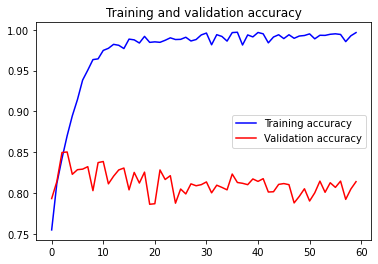

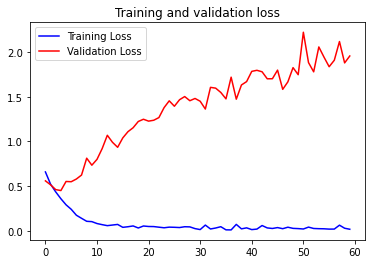

In [ ]:
acc_loss_graph(history)

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. 

Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

So, let's fine tune!

**Method 2: Use Model Checkpoint callback (recommended)**

*Create a tf.keras.callbacks.ModelCheckpoint callback that save model checkpoints during training:*
- ```save_best_only```: Whether to only keep the model that has achieved the "best performance" so far, or whether to save the model at the end of every epoch regardless of performance.
- ```save_weights_only```: Whether only weights are saved, or the whole model is saved.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=60,
                    callbacks=[checkpoint_callback],
                    verbose=2)

Epoch 1/60

Epoch 00001: val_loss improved from inf to 2.02437, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint.h5
439/439 - 25s - loss: 0.0121 - accuracy: 0.9964 - val_loss: 2.0244 - val_accuracy: 0.8100 - 25s/epoch - 56ms/step
Epoch 2/60

Epoch 00002: val_loss did not improve from 2.02437
439/439 - 26s - loss: 0.0078 - accuracy: 0.9974 - val_loss: 2.1147 - val_accuracy: 0.8130 - 26s/epoch - 58ms/step
Epoch 3/60

Epoch 00003: val_loss did not improve from 2.02437
439/439 - 25s - loss: 0.0335 - accuracy: 0.9911 - val_loss: 2.1361 - val_accuracy: 0.7933 - 25s/epoch - 58ms/step
Epoch 4/60

Epoch 00004: val_loss improved from 2.02437 to 1.86988, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint.h5
439/439 - 26s - loss: 0.0439 - accuracy: 0.9892 - val_loss: 1.8699 - val_accuracy: 0.8093 - 26s/epoch - 59ms/step
Epoch 5/60

Epoch 00005: val_loss did not improve from 1.86988
439/439 - 25s - loss: 0.0260 - accura

**Restore: Load both model and weights from h5 file**

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint.h5')

# Show the model architecture
restored_model.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Re-evaluate the model
loss, acc = restored_model.evaluate(validation_generator)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Fine tune 

#### Early Stopping

In [ ]:
earlystopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=10,
    verbose=1)

Now combines that with model checkpoint then you should have a killer way to train your model:
- Only train up to a certain point where model is no longer improved
- Get the best model with lowest validation loss without training the model again

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="my_model_checkpoint.h5",
                                                 save_weights_only=False, # the whole model (False) or only weights (True) 
                                                 save_best_only=True, # keep the best model with lowest validation loss
                                                 monitor='val_loss',
                                                 verbose=1)

#### Image Augmentation

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
Here's some code where we've added Image Augmentation. Run it to see the impact.


In [ ]:
def generator_augmentation_maker():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
# model = model_maker()

train_generator, validation_generator = generator_augmentation_maker()

history = restored_model.fit(train_generator,
                    epochs=60,
                    validation_data=validation_generator,
                    callbacks=[checkpoint_callback, earlystopping_callback], 
                    verbose=1) # verbose=2 if you want to hide the progress bar

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/60
439/439 [==============================] - ETA: 0s - loss: 1.0810 - accuracy: 0.6501
Epoch 00001: val_loss improved from 1.86988 to 0.58071, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint.h5
439/439 [==============================] - 98s 223ms/step - loss: 1.0810 - accuracy: 0.6501 - val_loss: 0.5807 - val_accuracy: 0.8017
Epoch 2/60
439/439 [==============================] - ETA: 0s - loss: 0.7877 - accuracy: 0.7129
Epoch 00002: val_loss improved from 0.58071 to 0.57935, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint.h5
439/439 [==============================] - 99s 226ms/step - loss: 0.7877 - accuracy: 0.7129 - val_loss: 0.5793 - val_accuracy: 0.7943
Epoch 3/60
110/439 [======>.......................] - ETA: 1:11 - loss: 0.7548 - accuracy: 0.7276

KeyboardInterrupt: ignored

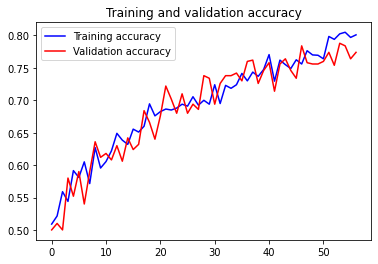

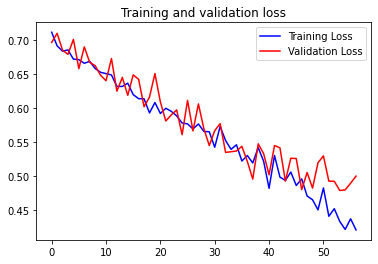

In [ ]:
acc_loss_graph(history)

Amazing! You can see that the image augmentation works so well to avoid overfitting since our model never the same image twice so it got no idea what is coming next to memorize the training set!

#### Dropout Layer

Dropout is one of the most popular regularization techniques for deep neural networks.

Even the state-of-the-art neural networks get a 1–2% accuracy boost simply by adding dropout. This may not sound like a lot, but when a model already has 95% accuracy, getting a 2% accuracy boost means dropping the error rate by almost 40% (going from 5% error to roughly 3%).

**Note**: Since dropout is only active during training, comparing the training loss and the validation loss can be misleading.

In [ ]:
from tensorflow.keras import layers

In [ ]:
def model_maker_with_dropout():
  model = tf.keras.models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      layers.MaxPooling2D(2, 2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Flatten(),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu'),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer='adam',
              metrics=['accuracy'])
  return model

**Let's combine both Image Augmentation and Dropout!**

In [ ]:
model = model_maker_with_dropout()
train_generator, validation_generator = generator_augmentation_maker()

history = model.fit(train_generator,
                    epochs=60,
                    validation_data=validation_generator,
                    callbacks=[checkpoint_callback, earlystopping_callback],
                    verbose=2)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/60

Epoch 00001: val_loss did not improve from 0.57935
439/439 - 96s - loss: 1.1759 - accuracy: 0.5260 - val_loss: 0.8929 - val_accuracy: 0.6680 - 96s/epoch - 218ms/step
Epoch 2/60

Epoch 00002: val_loss did not improve from 0.57935
439/439 - 95s - loss: 0.9908 - accuracy: 0.6103 - val_loss: 0.7585 - val_accuracy: 0.7193 - 95s/epoch - 217ms/step
Epoch 3/60

Epoch 00003: val_loss did not improve from 0.57935
439/439 - 95s - loss: 0.8869 - accuracy: 0.6627 - val_loss: 0.6876 - val_accuracy: 0.7557 - 95s/epoch - 217ms/step
Epoch 4/60

Epoch 00004: val_loss did not improve from 0.57935
439/439 - 94s - loss: 0.8411 - accuracy: 0.6901 - val_loss: 0.8128 - val_accuracy: 0.7177 - 94s/epoch - 214ms/step
Epoch 5/60

Epoch 00005: val_loss did not improve from 0.57935
439/439 - 94s - loss: 0.7845 - accuracy: 0.7131 - val_loss: 0.5894 - val_accuracy: 0.7903 - 94s/epoch - 213ms/step
Epoch 6/60

Epoch 00006: 

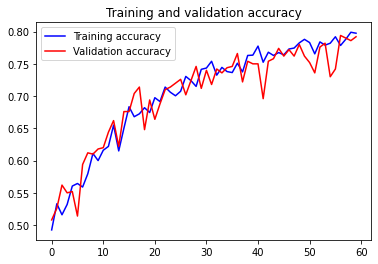

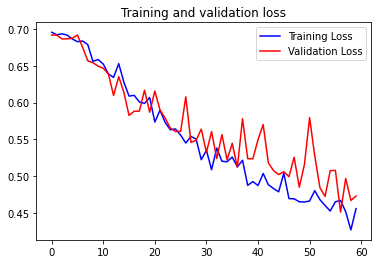

In [ ]:
acc_loss_graph(history)

You can see that by combining both image augmentation and dropout, the line of validation is following very closely to train set which is good news. However, there are a lot of spiking since our dense neurons need to works harder to detect features with image augmentation so dropout 50% gets in their way. Maybe it is worth to try again this time with lower dropout percentage.

#### My tuning

##### My first try

###### Create my model check point

In [ ]:
checkpoint_callback_my_1 = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_1.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_1 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=5, # Down to 5 from 10
    verbose=1)

In [ ]:
def generator_augmentation_maker_my_1():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
def model_maker_with_dropout_my_1():
  model = tf.keras.models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      layers.MaxPooling2D(2, 2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Flatten(),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu'),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer='adam',
              metrics=['accuracy'])
  return model

In [ ]:
model_my_1 = model_maker_with_dropout_my_1()

In [ ]:
train_generator_my_1, validation_generator_my_1 = generator_augmentation_maker_my_1()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history_my_1 = model_my_1.fit(train_generator_my_1,
                    epochs=60,
                    validation_data=validation_generator_my_1,
                    callbacks=[checkpoint_callback_my_1, earlystopping_callback_my_1],
                    verbose=2)

Epoch 1/60

Epoch 00001: val_loss improved from inf to 0.90648, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_1.h5
439/439 - 127s - loss: 1.1720 - accuracy: 0.5243 - val_loss: 0.9065 - val_accuracy: 0.6363 - 127s/epoch - 289ms/step
Epoch 2/60

Epoch 00002: val_loss did not improve from 0.90648
439/439 - 94s - loss: 0.9777 - accuracy: 0.6285 - val_loss: 0.9351 - val_accuracy: 0.6583 - 94s/epoch - 215ms/step
Epoch 3/60

Epoch 00003: val_loss improved from 0.90648 to 0.65509, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_1.h5
439/439 - 95s - loss: 0.9022 - accuracy: 0.6578 - val_loss: 0.6551 - val_accuracy: 0.7683 - 95s/epoch - 217ms/step
Epoch 4/60

Epoch 00004: val_loss did not improve from 0.65509
439/439 - 95s - loss: 0.8272 - accuracy: 0.6892 - val_loss: 0.6685 - val_accuracy: 0.7637 - 95s/epoch - 215ms/step
Epoch 5/60

Epoch 00005: val_loss improved from 0.65509 to 0.58622, saving model to /conte

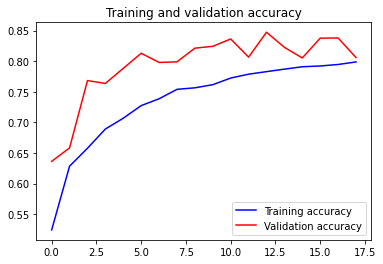

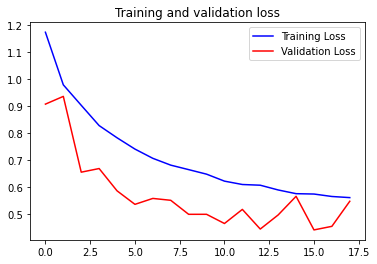

In [ ]:
acc_loss_graph(history_my_1)

In [ ]:
# Evaluate the model
loss, acc = model_my_1.evaluate(validation_generator)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 4s 44ms/step - loss: 0.5477 - accuracy: 0.8060
Restored model, accuracy: 80.60%


##### My second try

In [ ]:
checkpoint_callback_my_2 = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_2.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_2 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
def generator_augmentation_maker_my_2():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
def model_maker_with_dropout_my_2():
  model = tf.keras.models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      layers.MaxPooling2D(2, 2),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128, (3,3), activation='relu'),
      layers.MaxPooling2D(2,2),
      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_2 = model_maker_with_dropout_my_2()

In [ ]:
train_generator_my_2, validation_generator_my_2 = generator_augmentation_maker_my_2()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history_my_2 = model_my_2.fit(train_generator_my_2,
                    epochs=60,
                    validation_data=validation_generator_my_2,
                    callbacks=[checkpoint_callback_my_2, earlystopping_callback_my_2],
                    verbose=2)

Epoch 1/60

Epoch 00001: val_loss improved from inf to 1.05049, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_1.h5
439/439 - 101s - loss: 1.3049 - accuracy: 0.5057 - val_loss: 1.0505 - val_accuracy: 0.6410 - 101s/epoch - 230ms/step
Epoch 2/60

Epoch 00002: val_loss improved from 1.05049 to 1.03238, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_1.h5
439/439 - 84s - loss: 1.0726 - accuracy: 0.6142 - val_loss: 1.0324 - val_accuracy: 0.6537 - 84s/epoch - 190ms/step
Epoch 3/60

Epoch 00003: val_loss improved from 1.03238 to 0.90489, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_1.h5
439/439 - 84s - loss: 0.9957 - accuracy: 0.6423 - val_loss: 0.9049 - val_accuracy: 0.6973 - 84s/epoch - 190ms/step
Epoch 4/60

Epoch 00004: val_loss improved from 0.90489 to 0.82673, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_1.h5
439/4

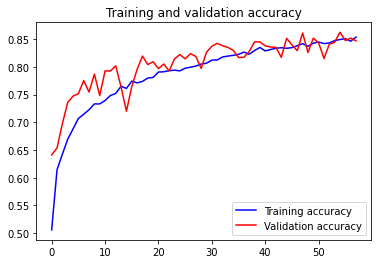

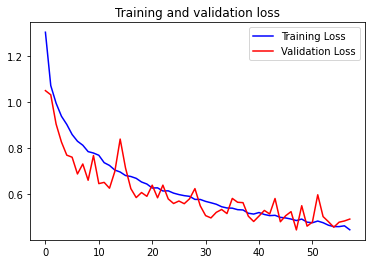

In [ ]:
acc_loss_graph(history_my_2)

In [ ]:
# Evaluate the model
loss, acc = model_my_2.evaluate(validation_generator_my_2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 3s 36ms/step - loss: 0.4908 - accuracy: 0.8470


##### My third try - VGG16

In [ ]:
checkpoint_callback_my_3 = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_3 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-1, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
def generator_augmentation_maker_my_3():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
from tensorflow.keras import optimizers

def model_maker_with_dropout_my_3():
  # VGG 16 
  model = tf.keras.models.Sequential([
        layers.Conv2D(64, (3,3), strides=(1, 1), padding='same',activation='relu', input_shape=(150, 150, 3)),
        layers.Conv2D(64, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(128, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(128, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(256, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(256, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(256, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        # layers.Dropout(0.2),
        layers.Dense(4096, activation='relu'),
        layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_3 = model_maker_with_dropout_my_3()

In [ ]:
train_generator_my_3, validation_generator_my_3 = generator_augmentation_maker_my_3()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history_my_3 = model_my_3.fit(train_generator_my_3,
                    epochs=60,
                    validation_data=validation_generator_my_3,
                    callbacks=[checkpoint_callback_my_3, earlystopping_callback_my_3],
                    verbose=2)

Epoch 1/60

Epoch 00001: val_loss improved from inf to 1.07500, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3.h5
439/439 - 216s - loss: 1.3183 - accuracy: 0.4565 - val_loss: 1.0750 - val_accuracy: 0.5813 - 216s/epoch - 492ms/step
Epoch 2/60

Epoch 00002: val_loss improved from 1.07500 to 0.89213, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3.h5
439/439 - 205s - loss: 1.0564 - accuracy: 0.5792 - val_loss: 0.8921 - val_accuracy: 0.6530 - 205s/epoch - 467ms/step
Epoch 3/60

Epoch 00003: val_loss did not improve from 0.89213
439/439 - 199s - loss: 0.9618 - accuracy: 0.6236 - val_loss: 1.0150 - val_accuracy: 0.6450 - 199s/epoch - 453ms/step
Epoch 4/60

Epoch 00004: val_loss improved from 0.89213 to 0.68232, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3.h5
439/439 - 207s - loss: 0.8533 - accuracy: 0.6806 - val_loss: 0.6823 - val_accuracy: 0.7593 - 207s/epo

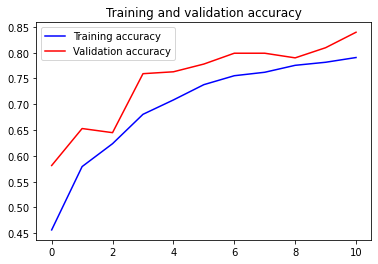

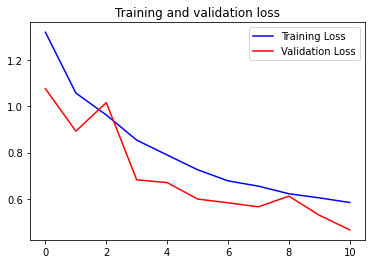

In [ ]:
acc_loss_graph(history_my_3)

###### Full VGG16_Manual_Regularization_Learning_Rate 

In [ ]:
checkpoint_callback_my_3a = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3a.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_3a = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
def generator_augmentation_maker_my_3a():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
from tensorflow.keras import optimizers

def model_maker_with_dropout_my_3a():
  # VGG 16 
  model = tf.keras.models.Sequential([
        layers.Conv2D(64, (3,3), strides=(1, 1), padding='same',activation='relu', input_shape=(150, 150, 3)),
        layers.Conv2D(64, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(128, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(128, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(256, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(256, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(256, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.Conv2D(512, (3,3), strides=(1, 1), padding='same',activation='relu'),
        layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
        layers.Flatten(),
        layers.Dense(2048, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.1),
        layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(6, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_3a = model_maker_with_dropout_my_3a()

In [ ]:
train_generator_my_3a, validation_generator_my_3a = generator_augmentation_maker_my_3a()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history_my_3a = model_my_3a.fit(train_generator_my_3a,
                    epochs=20,
                    validation_data=validation_generator_my_3a,
                    callbacks=[checkpoint_callback_my_3a, earlystopping_callback_my_3a],
                    batch_size=32,
                    verbose=2)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 1.83413, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3a.h5
439/439 - 77s - loss: 2.9145 - accuracy: 0.4187 - val_loss: 1.8341 - val_accuracy: 0.5707 - 77s/epoch - 175ms/step
Epoch 2/20

Epoch 00002: val_loss improved from 1.83413 to 1.42826, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3a.h5
439/439 - 80s - loss: 1.7459 - accuracy: 0.5417 - val_loss: 1.4283 - val_accuracy: 0.6223 - 80s/epoch - 182ms/step
Epoch 3/20

Epoch 00003: val_loss improved from 1.42826 to 1.20479, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3a.h5
439/439 - 80s - loss: 1.4700 - accuracy: 0.5905 - val_loss: 1.2048 - val_accuracy: 0.6653 - 80s/epoch - 182ms/step
Epoch 4/20

Epoch 00004: val_loss improved from 1.20479 to 1.11414, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3a.h5
439

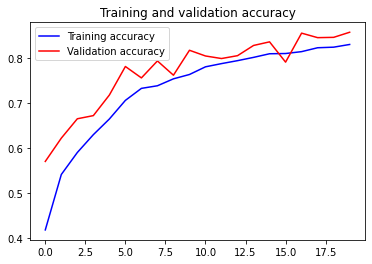

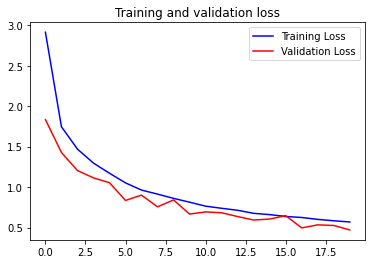

In [ ]:
acc_loss_graph(history_my_3a)

In [ ]:
# Evaluate the model
loss, acc = model_my_3a.evaluate(validation_generator_my_3a)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 4s 37ms/step - loss: 0.4706 - accuracy: 0.8573
Restored model, accuracy: 85.73%


In [ ]:
# Train 10 more epochs
history_my_3a_1 = model_my_3a.fit(train_generator_my_3a,
                    epochs=10,
                    validation_data=validation_generator_my_3a,
                    callbacks=[checkpoint_callback_my_3a, earlystopping_callback_my_3a],
                    batch_size=32,
                    verbose=2)

Epoch 1/10

Epoch 00001: val_loss did not improve from 0.47057
439/439 - 75s - loss: 0.5536 - accuracy: 0.8302 - val_loss: 0.4906 - val_accuracy: 0.8473 - 75s/epoch - 172ms/step
Epoch 2/10

Epoch 00002: val_loss did not improve from 0.47057
439/439 - 75s - loss: 0.5429 - accuracy: 0.8343 - val_loss: 0.5222 - val_accuracy: 0.8443 - 75s/epoch - 170ms/step
Epoch 3/10

Epoch 00003: val_loss improved from 0.47057 to 0.44550, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3a.h5
439/439 - 78s - loss: 0.5311 - accuracy: 0.8375 - val_loss: 0.4455 - val_accuracy: 0.8647 - 78s/epoch - 178ms/step
Epoch 4/10

Epoch 00004: val_loss did not improve from 0.44550
439/439 - 75s - loss: 0.5208 - accuracy: 0.8400 - val_loss: 0.4823 - val_accuracy: 0.8497 - 75s/epoch - 171ms/step
Epoch 5/10

Epoch 00005: val_loss did not improve from 0.44550
439/439 - 75s - loss: 0.5048 - accuracy: 0.8467 - val_loss: 0.5861 - val_accuracy: 0.8163 - 75s/epoch - 170ms/step
Epoch 6/1

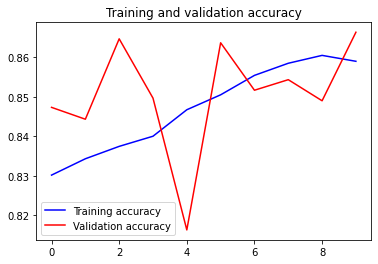

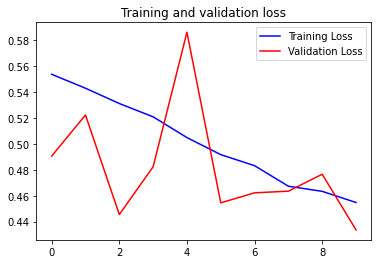

In [ ]:
acc_loss_graph(history_my_3a_1)

In [ ]:
# Evaluate the model
loss, acc = model_my_3a.evaluate(validation_generator_my_3a)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 3s 35ms/step - loss: 0.4336 - accuracy: 0.8663
Restored model, accuracy: 86.63%


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model_3a = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3a.h5')

# Show the model architecture
# restored_model_3a.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model_3a.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Re-evaluate the model
loss, acc = restored_model_3a.evaluate(validation_generator_my_3a)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
# Re-evaluate the model
loss_train, acc_train = restored_model_3a.evaluate(train_generator_my_3a)
print("Restored model, accuracy_train: {:5.2f}%".format(100*acc))

94/94 [==============================] - 4s 38ms/step - loss: 0.4336 - accuracy: 0.8663
Restored model, accuracy: 86.63%
439/439 [==============================] - 84s 190ms/step - loss: 0.4241 - accuracy: 0.8655
Restored model, accuracy_train: 86.63%


In [ ]:
acc_model_3a_train = acc_train
acc_model_3a_valid = acc

In [ ]:
restored_model_3a.summary()

###### VGG16 From Kera + My Layer

In [ ]:
checkpoint_callback_my_3b = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3b.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_3b = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
def generator_augmentation_maker_my_3b():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(240,240),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(240, 240),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

####### Extract Features with VGG16
####### First 10 epochs: accuracy on test set 91.03% - Accuracy on Train set: 90.05%
####### Second 10 epochs: 
####### First 10 epochs: accuracy on test set 91.6% - Accuracy on Train set: 91.29%
####### Second 10 epochs: 

In [ ]:
model_my_3b = VGG16(weights='imagenet',include_top=False,input_shape=(240, 240, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model_my_3b.summary()

In [ ]:
# train_images.shape

(14034, 150, 150, 3)

In [ ]:
# train_features = model_my_3b.predict(train_images)
# test_features = model_my_3b.predict(test_images)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [ ]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count, 6))

    generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory,
        target_size=(240, 240),
        batch_size = batch_size, 
        class_mode='categorical')

    i = 0

    print('Entering for loop...');

    
    for inputs_batch, labels_batch in generator:
        features_batch = model_my_3b.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 14034)
validation_features, validation_labels = extract_features(validation_dir, 3000)

Found 14034 images belonging to 6 classes.
Entering for loop...
Found 3000 images belonging to 6 classes.
Entering for loop...


In [ ]:
validation_features.shape

(3000, 7, 7, 512)

In [ ]:
train_features.shape

(14034, 7, 7, 512)

In [ ]:
train_labels.shape

(14034, 6)

In [ ]:
validation_labels.shape

(3000, 6)

In [ ]:
train_labels = np.reshape(train_labels, (14034, 7 * 7 * 512))
validation_labels = np.reshape(validation_labels, (3000, 7 * 7 * 512))

In [ ]:
# model_new = models.Sequential()
# model_new.add(layers.Dense(2048, activation='relu', input_dim=7 * 7 * 512))
# model_new.add(layers.Dropout(0.5))
# model_new.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
# model_new.add(layers.Dropout(0.5))
# model_new.add(layers.Dense(128, activation='relu', input_dim=7 * 7 * 512))
# model_new.add(layers.Dropout(0.5))
# model_new.add(layers.Dense(6, activation='softmax'))

In [ ]:
model_new = models.Sequential()
model_new.add(layers.Dense(2048, activation='relu'))
model_new.add(layers.Dropout(0.5))
model_new.add(layers.Dense(512, activation='relu'))
model_new.add(layers.Dropout(0.5))
model_new.add(Flatten)
model_new.add(layers.Dense(128, activation='relu'))
model_new.add(layers.Dropout(0.5))
model_new.add(layers.Dense(6, activation='softmax'))

In [ ]:
model_new.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history_model_new = model_new.fit(train_features, train_labels,
                    epochs=25,
                    batch_size=32,
                    validation_data=(validation_features, validation_labels))

In [ ]:
def model_maker_with_dropout_my_3b():
  model = tf.keras.models.Sequential([
      model_my_3b,
      layers.Flatten(),
      layers.Dense(2048, activation='relu', input_dim= 7 * 7 * 512 ),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu', input_dim=7 * 7 * 512),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_3b_new = model_maker_with_dropout_my_3b()

In [ ]:
train_generator_my_3b, validation_generator_my_3b = generator_augmentation_maker_my_3b()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history_my_3b = model_my_3b_new.fit(train_generator_my_3b,
                    epochs=10,
                    validation_data=validation_generator_my_3b,
                    callbacks=[checkpoint_callback_my_3b, earlystopping_callback_my_3b],
                    batch_size = 32,
                    verbose=2)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.49021, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3b.h5
439/439 - 178s - loss: 0.9377 - accuracy: 0.6256 - val_loss: 0.4902 - val_accuracy: 0.8177 - 178s/epoch - 405ms/step
Epoch 2/10

Epoch 00002: val_loss improved from 0.49021 to 0.36562, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3b.h5
439/439 - 175s - loss: 0.5482 - accuracy: 0.8085 - val_loss: 0.3656 - val_accuracy: 0.8683 - 175s/epoch - 399ms/step
Epoch 3/10

Epoch 00003: val_loss improved from 0.36562 to 0.28924, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3b.h5
439/439 - 174s - loss: 0.4498 - accuracy: 0.8483 - val_loss: 0.2892 - val_accuracy: 0.8920 - 174s/epoch - 397ms/step
Epoch 4/10

Epoch 00004: val_loss did not improve from 0.28924
439/439 - 169s - loss: 0.4108 - accuracy: 0.8615 - val_loss: 0.3153 - val_accuracy: 0.8850 - 169s/

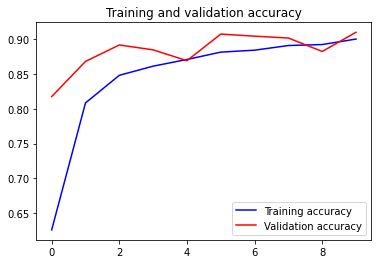

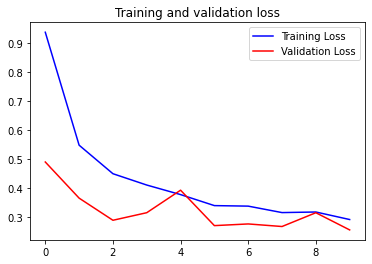

In [ ]:
acc_loss_graph(history_my_3b)

In [ ]:
# Evaluate the model
loss, acc = model_my_3b_new.evaluate(validation_generator_my_3b)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 7s 75ms/step - loss: 0.2560 - accuracy: 0.9103
Restored model, accuracy: 91.03%


In [ ]:
# Train 10 more epoch
history_my_3b_1 = model_my_3b_new.fit(train_generator_my_3b,
                    epochs=10,
                    validation_data=validation_generator_my_3b,
                    callbacks=[checkpoint_callback_my_3b, earlystopping_callback_my_3b],
                    batch_size = 32,
                    verbose=2)

Epoch 1/10

Epoch 00001: val_loss did not improve from 0.25597
439/439 - 167s - loss: 0.2939 - accuracy: 0.8988 - val_loss: 0.2881 - val_accuracy: 0.8983 - 167s/epoch - 380ms/step
Epoch 2/10

Epoch 00002: val_loss did not improve from 0.25597
439/439 - 167s - loss: 0.2846 - accuracy: 0.9025 - val_loss: 0.2754 - val_accuracy: 0.9037 - 167s/epoch - 380ms/step
Epoch 3/10

Epoch 00003: val_loss did not improve from 0.25597
439/439 - 166s - loss: 0.2779 - accuracy: 0.9053 - val_loss: 0.2864 - val_accuracy: 0.9030 - 166s/epoch - 379ms/step
Epoch 4/10

Epoch 00004: val_loss did not improve from 0.25597
439/439 - 166s - loss: 0.2556 - accuracy: 0.9099 - val_loss: 0.2844 - val_accuracy: 0.9043 - 166s/epoch - 379ms/step
Epoch 5/10

Epoch 00005: val_loss did not improve from 0.25597
439/439 - 166s - loss: 0.2560 - accuracy: 0.9133 - val_loss: 0.3072 - val_accuracy: 0.8973 - 166s/epoch - 379ms/step
Epoch 6/10

Epoch 00006: val_loss improved from 0.25597 to 0.24067, saving model to /content/gdrive/

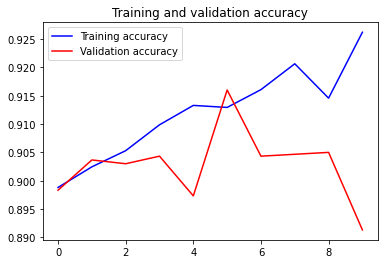

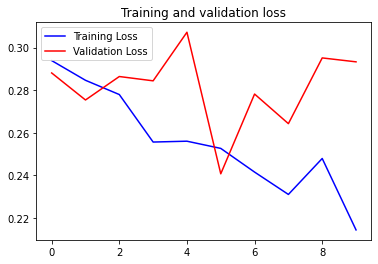

In [ ]:
acc_loss_graph(history_my_3b_1)

In [ ]:
# Evaluate the model
loss, acc = model_my_3b_new.evaluate(validation_generator_my_3b)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 7s 75ms/step - loss: 0.2933 - accuracy: 0.8913
Restored model, accuracy: 89.13%


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model_3b_new = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3b.h5')

# Show the model architecture
restored_model_3b_new.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model_3b_new.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Re-evaluate the model
loss_3b, acc_3b = restored_model_3b_new.evaluate(validation_generator_my_3b)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
# Re-evaluate the model
loss_train_3b, acc_train_3b = restored_model_3b_new.evaluate(train_generator_my_3b)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_29 (Dense)            (None, 2048)              51382272  
                                                                 
 dropout_22 (Dropout)        (None, 2048)              0         
                                                                 
 dense_30 (Dense)            (None, 512)               1049088   
                                                                 
 dense_31 (Dense)            (None, 128)               65664     
                                                                 
 dropout_23 (Dropout)        (None, 128)              

In [ ]:
acc_model_3b_train = acc_train_3b
acc_model_3b_valid = acc_3b

###### VGG16 From Kera + My Layer + Regularization + Learning_Rate

In [ ]:
checkpoint_callback_my_3c = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3c.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_3c = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
def generator_augmentation_maker_my_3c():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
model_my_3c = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [ ]:
def model_maker_with_dropout_my_3c():
  model = tf.keras.models.Sequential([
      model_my_3c,
      layers.Flatten(),
      layers.Dense(2048, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_3c = model_maker_with_dropout_my_3c()

In [ ]:
train_generator_my_3c, validation_generator_my_3c = generator_augmentation_maker_my_3c()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history_my_3c = model_my_3c.fit(train_generator_my_3c,
                    epochs=10,
                    validation_data=validation_generator_my_3c,
                    callbacks=[checkpoint_callback_my_3c, earlystopping_callback_my_3c],
                    batch_size = 32,
                    verbose=2)

Epoch 1/20

Epoch 00001: val_loss did not improve from 1.75444
439/439 - 76s - loss: 3.1097 - accuracy: 0.7135 - val_loss: 2.0313 - val_accuracy: 0.8383 - 76s/epoch - 173ms/step
Epoch 2/20

Epoch 00002: val_loss improved from 1.75444 to 1.46881, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3c.h5
439/439 - 78s - loss: 1.7950 - accuracy: 0.8381 - val_loss: 1.4688 - val_accuracy: 0.8757 - 78s/epoch - 177ms/step
Epoch 3/20

Epoch 00003: val_loss improved from 1.46881 to 1.16755, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3c.h5
439/439 - 78s - loss: 1.3853 - accuracy: 0.8645 - val_loss: 1.1676 - val_accuracy: 0.8947 - 78s/epoch - 178ms/step
Epoch 4/20

Epoch 00004: val_loss improved from 1.16755 to 0.99113, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3c.h5
439/439 - 79s - loss: 1.1659 - accuracy: 0.8684 - val_loss: 0.9911 - val_accuracy: 0.8940 - 79s/epoc

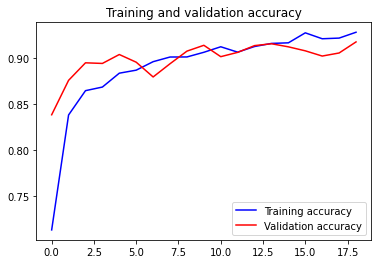

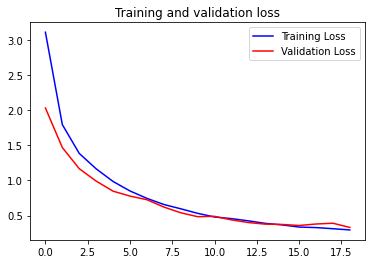

In [ ]:
acc_loss_graph(history_my_3c)

In [ ]:
# Evaluate the model
loss, acc = model_my_3c.evaluate(validation_generator_my_3c)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 4s 37ms/step - loss: 0.3316 - accuracy: 0.9173
Restored model, accuracy: 91.73%


In [ ]:
# Run 10 more epochs
history_my_3c_1 = model_my_3c.fit(train_generator_my_3c,
                    epochs=20,
                    validation_data=validation_generator_my_3c,
                    callbacks=[checkpoint_callback_my_3c, earlystopping_callback_my_3c],
                    batch_size = 32,
                    verbose=2)

Epoch 1/20

Epoch 00001: val_loss did not improve from 0.33156
439/439 - 75s - loss: 0.2856 - accuracy: 0.9287 - val_loss: 0.3412 - val_accuracy: 0.9160 - 75s/epoch - 171ms/step
Epoch 2/20

Epoch 00002: val_loss did not improve from 0.33156
439/439 - 75s - loss: 0.2713 - accuracy: 0.9344 - val_loss: 0.3406 - val_accuracy: 0.9147 - 75s/epoch - 170ms/step
Epoch 3/20

Epoch 00003: val_loss did not improve from 0.33156
439/439 - 75s - loss: 0.2628 - accuracy: 0.9331 - val_loss: 0.3444 - val_accuracy: 0.8993 - 75s/epoch - 171ms/step
Epoch 4/20

Epoch 00004: val_loss improved from 0.33156 to 0.32564, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3c.h5
439/439 - 79s - loss: 0.2599 - accuracy: 0.9328 - val_loss: 0.3256 - val_accuracy: 0.9147 - 79s/epoch - 180ms/step
Epoch 5/20

Epoch 00005: val_loss improved from 0.32564 to 0.30092, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3c.h5
439/439 - 78s - loss: 0

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model_3c = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3c.h5')

# Show the model architecture
# restored_model_3c.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model_3c.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Re-evaluate the model
loss_3c, acc_3c = restored_model_3c.evaluate(validation_generator_my_3c)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
# Re-evaluate the model
loss_train_3c, acc_train_3c = restored_model_3c.evaluate(train_generator_my_3c)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 4s 39ms/step - loss: 0.3009 - accuracy: 0.9113
Restored model, accuracy: 86.63%
439/439 [==============================] - 84s 191ms/step - loss: 0.2154 - accuracy: 0.9438
Restored model, accuracy: 86.63%


In [ ]:
acc_model_3c_train = acc_train_3c
acc_model_3c_valid = acc_3c

###### VGG19 From Kera + My Layer + Regularization + Learning_Rate

In [ ]:
checkpoint_callback_my_3d = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_3d.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_3d = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
def generator_augmentation_maker_my_3d():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
model_my_3d = VGG19(weights='imagenet',include_top=False,input_shape=(150, 150, 3))

In [ ]:
model_my_3d.summary()

In [ ]:
def model_maker_with_dropout_my_3d():
  model = tf.keras.models.Sequential([
      model_my_3d,
      layers.Flatten(),
      layers.Dense(2048, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.4),
      layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.SGD(learning_rate=0.1, momentum=0.9),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_3d = model_maker_with_dropout_my_3d()

In [ ]:
train_generator_my_3d, validation_generator_my_3d = generator_augmentation_maker_my_3d()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history_my_3d = model_my_3d.fit(train_generator_my_3d,
                    epochs=20,
                    validation_data=validation_generator_my_3d,
                    callbacks=[checkpoint_callback_my_3d, earlystopping_callback_my_3d],
                    batch_size = 32,
                    verbose=2)

##### My fourth try - AlexNet

In [ ]:
checkpoint_callback_my_4 = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_4.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_4 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

In [ ]:
def generator_augmentation_maker_my_4():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(227,227),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(227, 227),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
def model_maker_with_dropout_my_4():
  model = tf.keras.models.Sequential([
      layers.Conv2D(96, (11,11), strides=(4, 4), padding='valid',activation='relu', input_shape=(227, 227, 3)),
      layers.BatchNormalization(),
      layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
      layers.Conv2D(256, (5,5), strides=(1, 1), padding='same',activation='relu'),
      layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
      layers.Conv2D(384, (3,3), strides=(1, 1), padding='same',activation='relu'),
      layers.BatchNormalization(),
      layers.Conv2D(384, (3,3), strides=(1, 1), padding='same',activation='relu'),
      layers.BatchNormalization(),
      layers.Conv2D(256, (3,3), strides=(1, 1), padding='same',activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
      layers.Flatten(),
      layers.Dense(4096, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(4096, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_4 = model_maker_with_dropout_my_4()

In [ ]:
train_generator_my_4, validation_generator_my_4 = generator_augmentation_maker_my_4()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
history_my_4 = model_my_4.fit(train_generator_my_4,
                    epochs=60,
                    validation_data=validation_generator_my_4,
                    callbacks=[checkpoint_callback_my_4, earlystopping_callback_my_4],
                    verbose=2)

Epoch 1/60

Epoch 00001: val_loss improved from inf to 1.52597, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_4.h5
439/439 - 170s - loss: 1.7544 - accuracy: 0.4994 - val_loss: 1.5260 - val_accuracy: 0.4023 - 170s/epoch - 387ms/step
Epoch 2/60

Epoch 00002: val_loss did not improve from 1.52597
439/439 - 164s - loss: 1.1847 - accuracy: 0.5875 - val_loss: 1.5532 - val_accuracy: 0.4727 - 164s/epoch - 374ms/step
Epoch 3/60

Epoch 00003: val_loss improved from 1.52597 to 0.96931, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_4.h5
439/439 - 169s - loss: 1.0569 - accuracy: 0.6281 - val_loss: 0.9693 - val_accuracy: 0.6423 - 169s/epoch - 385ms/step
Epoch 4/60

Epoch 00004: val_loss did not improve from 0.96931
439/439 - 164s - loss: 0.9266 - accuracy: 0.6677 - val_loss: 2.3812 - val_accuracy: 0.3367 - 164s/epoch - 374ms/step
Epoch 5/60

Epoch 00005: val_loss improved from 0.96931 to 0.75093, saving model to 

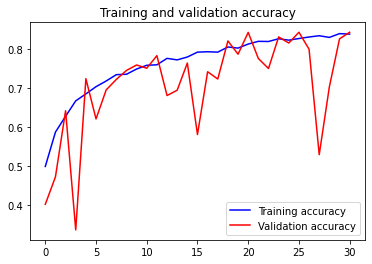

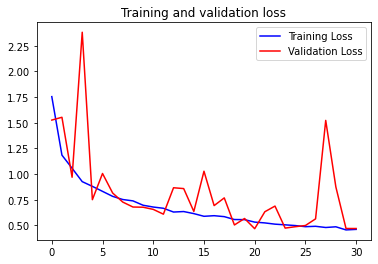

In [ ]:
acc_loss_graph(history_my_4)

In [ ]:
# Evaluate the model
loss, acc = model_my_4.evaluate(validation_generator_my_4)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 5s 54ms/step - loss: 0.4702 - accuracy: 0.8437
Restored model, accuracy: 84.37%


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model_4 = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_4.h5')

# Show the model architecture
# restored_model_4.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model_4.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Re-evaluate the model
loss_4, acc_4 = restored_model_4.evaluate(validation_generator_my_4)
print("Restored model, accuracy: {:5.2f}%".format(100*acc_4))
# Re-evaluate the model
loss_train_4, acc_train_4 = restored_model_4.evaluate(train_generator_my_4)
print("Restored model, accuracy: {:5.2f}%".format(100*acc_train_4))

94/94 [==============================] - 5s 53ms/step - loss: 0.4683 - accuracy: 0.8433
Restored model, accuracy: 84.33%
439/439 [==============================] - 166s 379ms/step - loss: 0.5309 - accuracy: 0.8161
Restored model, accuracy: 81.61%


In [ ]:
acc_model_4_train = acc_train_4
acc_model_4_valid = acc_4

##### My fifth try - Res50 from Keras + My layers + Learning Rate + Regularization 

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
checkpoint_callback_my_5 = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_5 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model_my_5_baseRes = ResNet50(include_top = False, weights = 'imagenet',input_shape=(150,150,3))

In [ ]:
def model_maker_with_dropout_my_5():
  model = tf.keras.models.Sequential([
      model_my_5_baseRes,
      layers.Flatten(),
      layers.Dense(2048, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
def generator_augmentation_maker_my_5():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
train_generator_my_5, validation_generator_my_5 = generator_augmentation_maker_my_5()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model_my_5 = model_maker_with_dropout_my_5()

In [ ]:
history_my_5 = model_my_5.fit(train_generator_my_5,
                                epochs=20,
                                validation_data=validation_generator_my_5,
                                callbacks=[checkpoint_callback_my_5, earlystopping_callback_my_5],
                                verbose=2)

Epoch 1/20

Epoch 00001: val_loss did not improve from 5.58756
439/439 - 83s - loss: 5.2554 - accuracy: 0.7961 - val_loss: 6.7807 - val_accuracy: 0.1683 - 83s/epoch - 190ms/step
Epoch 2/20

Epoch 00002: val_loss improved from 5.58756 to 3.91654, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


439/439 - 84s - loss: 4.2772 - accuracy: 0.8777 - val_loss: 3.9165 - val_accuracy: 0.8720 - 84s/epoch - 191ms/step
Epoch 3/20

Epoch 00003: val_loss improved from 3.91654 to 3.12323, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5.h5
439/439 - 89s - loss: 3.5180 - accuracy: 0.8937 - val_loss: 3.1232 - val_accuracy: 0.9183 - 89s/epoch - 202ms/step
Epoch 4/20

Epoch 00004: val_loss improved from 3.12323 to 2.58252, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5.h5
439/439 - 88s - loss: 2.8564 - accuracy: 0.9080 - val_loss: 2.5825 - val_accuracy: 0.9137 - 88s/epoch - 201ms/step
Epoch 5/20

Epoch 00005: val_loss improved from 2.58252 to 2.05518, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5.h5
439/439 - 93s - loss: 2.3116 - accuracy: 0.9134 - val_loss: 2.0552 - val_accuracy: 0.9203 - 93s/epoch - 212ms/step
Epoch 6/20

Epoch 00006: val_loss improved from 2.0

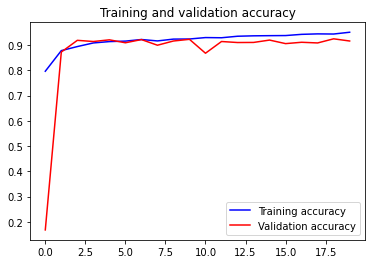

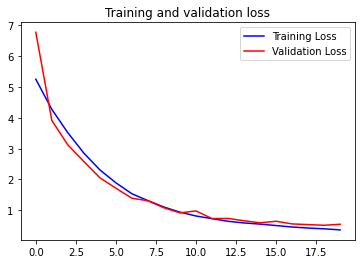

In [ ]:
acc_loss_graph(history_my_5)

In [ ]:
# Evaluate the model
loss, acc = model_my_5.evaluate(validation_generator_my_5)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

94/94 [==============================] - 4s 42ms/step - loss: 0.5460 - accuracy: 0.9157
Restored model, accuracy: 91.57%


In [ ]:
history_my_5 = model_my_5.fit(train_generator_my_5,
                                epochs=20,
                                validation_data=validation_generator_my_5,
                                callbacks=[checkpoint_callback_my_5, earlystopping_callback_my_5],
                                verbose=2)

Epoch 1/20

Epoch 00001: val_loss improved from 0.51242 to 0.47032, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


439/439 - 86s - loss: 0.3613 - accuracy: 0.9450 - val_loss: 0.4703 - val_accuracy: 0.9193 - 86s/epoch - 196ms/step
Epoch 2/20

Epoch 00002: val_loss did not improve from 0.47032
439/439 - 79s - loss: 0.3392 - accuracy: 0.9487 - val_loss: 0.5829 - val_accuracy: 0.8787 - 79s/epoch - 181ms/step
Epoch 3/20

Epoch 00003: val_loss did not improve from 0.47032
439/439 - 77s - loss: 0.3697 - accuracy: 0.9439 - val_loss: 0.4730 - val_accuracy: 0.9227 - 77s/epoch - 176ms/step
Epoch 4/20

Epoch 00004: val_loss did not improve from 0.47032
439/439 - 77s - loss: 0.3096 - accuracy: 0.9516 - val_loss: 0.4706 - val_accuracy: 0.9130 - 77s/epoch - 175ms/step
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.47032
439/439 - 77s - loss: 0.2884 - accuracy: 0.9530 - val_loss: 0.5619 - val_accuracy: 0.9037 - 77s/epoch - 176ms/step
Epoch 6/20

Epoch 00006: val_loss improved from 0.47032 to 0.43290, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5.h5
439/439 - 

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model_5 = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5.h5')

# # Show the model architecture
# restored_model_5.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model_5.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Re-evaluate the model
loss_5, acc_5 = restored_model_5.evaluate(validation_generator_my_5)
print("Restored model, accuracy: {:5.2f}%".format(100*acc_5))
# Re-evaluate the model
loss_train_5, acc_train_5 = restored_model_5.evaluate(train_generator_my_5)
print("Restored model, accuracy: {:5.2f}%".format(100*acc_train_5))

94/94 [==============================] - 6s 45ms/step - loss: 0.3853 - accuracy: 0.9260
Restored model, accuracy: 92.60%
439/439 [==============================] - 86s 196ms/step - loss: 0.1619 - accuracy: 0.9760
Restored model, accuracy: 97.60%


In [ ]:
acc_model_5_train = acc_train_5
acc_model_5_valid = acc_5

###### Res50V2

In [ ]:
checkpoint_callback_my_5a = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5a.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_5a = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model_my_5a_baseRes = ResNet50(include_top = False, weights = 'imagenet',input_shape=(150,150,3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
def model_maker_with_dropout_my_5a():
  model = tf.keras.models.Sequential([
      model_my_5a_baseRes,
      layers.Flatten(),
      layers.Dense(2048, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
def generator_augmentation_maker_my_5a():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
train_generator_my_5a, validation_generator_my_5a = generator_augmentation_maker_my_5a()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model_my_5a = model_maker_with_dropout_my_5a()

In [ ]:
history_my_5a = model_my_5a.fit(train_generator_my_5a,
                                epochs=20,
                                validation_data=validation_generator_my_5a,
                                callbacks=[checkpoint_callback_my_5a, earlystopping_callback_my_5a],
                                verbose=2)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 6.02184, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5a.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


439/439 - 106s - loss: 5.2985 - accuracy: 0.7742 - val_loss: 6.0218 - val_accuracy: 0.2703 - 106s/epoch - 243ms/step
Epoch 2/20

Epoch 00002: val_loss improved from 6.02184 to 4.09174, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5a.h5
439/439 - 104s - loss: 4.4067 - accuracy: 0.8673 - val_loss: 4.0917 - val_accuracy: 0.8523 - 104s/epoch - 238ms/step
Epoch 3/20

Epoch 00003: val_loss improved from 4.09174 to 3.36877, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5a.h5
439/439 - 103s - loss: 3.7553 - accuracy: 0.8881 - val_loss: 3.3688 - val_accuracy: 0.9187 - 103s/epoch - 235ms/step
Epoch 4/20

Epoch 00004: val_loss improved from 3.36877 to 2.90182, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5a.h5
439/439 - 103s - loss: 3.1651 - accuracy: 0.9017 - val_loss: 2.9018 - val_accuracy: 0.9157 - 103s/epoch - 234ms/step
Epoch 5/20

Epoch 00005: val_loss improv

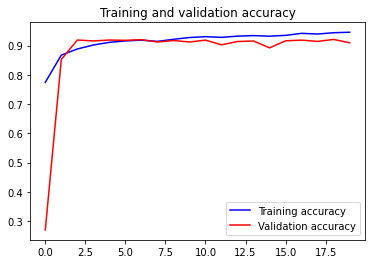

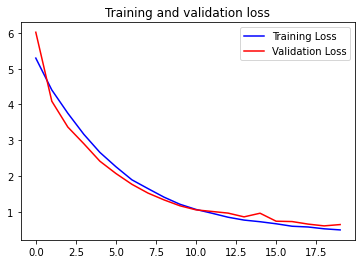

In [ ]:
acc_loss_graph(history_my_5a)

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model_5a = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5a.h5')

# Show the model architecture
restored_model_5a.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model_5a.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Re-evaluate the model
loss_5a, acc_5a = restored_model_5a.evaluate(validation_generator_my_5a)
print("Restored model, accuracy: {:5.2f}%".format(100*acc_5a))
# Re-evaluate the model
loss_train_5a, acc_train_5a = restored_model_5a.evaluate(train_generator_my_5a)
print("Restored model, accuracy: {:5.2f}%".format(100*acc_train_5a))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_8 (Dense)             (None, 2048)              104859648 
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1049088   
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [ ]:
acc_model_5a_train = acc_train_5a
acc_model_5a_valid = acc_5a

###### ResNet Manual Model

In [ ]:
checkpoint_callback_my_5b = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5b.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_5b = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True,
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)
### Link Keras https://keras.io/api/callbacks/early_stopping/

In [ ]:
ReduceLROnPlateau_callback_my_5b = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    mode='auto',
    #min_delta=1e-2,
    min_lr=0.0001,
    verbose=1)
# Link: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

In [ ]:
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model_my_5_baseRes_5b = ResNet50(include_top = False, weights = 'imagenet',input_shape=(150,150,3))
model_my_5_baseRes_5b.trainable = False

In [ ]:
def generator_augmentation_maker_my_5b_no_extra():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      #brightness_range = 0.2, # Brightness
                      #zca_whitening=True, # ZCA Whitening
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      preprocess_input=tf.keras.applications.resnet50.preprocess_input,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator
### Link Tensorflow: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
def model_maker_with_dropout_my_5b():
    input_ = keras.layers.Input(shape=(150,150,3))
    
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
def model_maker_with_dropout_my_5b():
  model = tf.keras.models.Sequential([
      model_my_5_baseRes_5b.preprocess_input,
      model_my_5_baseRes_5b,
      layers.Flatten(),
      layers.Dense(2048, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.4),
      layers.Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer='Adam',
              metrics=['accuracy'])
  return model

In [ ]:
train_generator_my_5b, validation_generator_my_5b = generator_augmentation_maker_my_5b()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model_my_5b = model_maker_with_dropout_my_5b()

In [ ]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_my_5b = model_my_5b.fit(train_generator_my_5b,
                                epochs=60,
                                validation_data=validation_generator_my_5b,
                                callbacks=[checkpoint_callback_my_5b, earlystopping_callback_my_5b,ReduceLROnPlateau_callback_my_5b],
                                verbose=2)

Epoch 1/60

Epoch 00001: val_loss did not improve from 1.79433
439/439 - 93s - loss: 2.9042 - accuracy: 0.1911 - val_loss: 2.2257 - val_accuracy: 0.2687 - lr: 0.0010 - 93s/epoch - 212ms/step
Epoch 2/60

Epoch 00002: val_loss did not improve from 1.79433
439/439 - 86s - loss: 2.1478 - accuracy: 0.2445 - val_loss: 1.9242 - val_accuracy: 0.3210 - lr: 0.0010 - 86s/epoch - 196ms/step
Epoch 3/60

Epoch 00003: val_loss did not improve from 1.79433
439/439 - 87s - loss: 1.9852 - accuracy: 0.2636 - val_loss: 1.8568 - val_accuracy: 0.3223 - lr: 0.0010 - 87s/epoch - 199ms/step
Epoch 4/60

Epoch 00004: val_loss improved from 1.79433 to 1.72157, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5b.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


439/439 - 108s - loss: 1.9311 - accuracy: 0.2510 - val_loss: 1.7216 - val_accuracy: 0.3127 - lr: 0.0010 - 108s/epoch - 246ms/step
Epoch 5/60

Epoch 00005: val_loss improved from 1.72157 to 1.67722, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5b.h5
439/439 - 111s - loss: 1.8219 - accuracy: 0.2683 - val_loss: 1.6772 - val_accuracy: 0.3183 - lr: 0.0010 - 111s/epoch - 253ms/step
Epoch 6/60

Epoch 00006: val_loss improved from 1.67722 to 1.59250, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5b.h5
439/439 - 110s - loss: 1.7692 - accuracy: 0.2686 - val_loss: 1.5925 - val_accuracy: 0.3200 - lr: 0.0010 - 110s/epoch - 252ms/step
Epoch 7/60

Epoch 00007: val_loss did not improve from 1.59250
439/439 - 89s - loss: 1.7251 - accuracy: 0.2673 - val_loss: 1.5964 - val_accuracy: 0.2987 - lr: 0.0010 - 89s/epoch - 203ms/step
Epoch 8/60

Epoch 00008: val_loss improved from 1.59250 to 1.50973, saving model to /conten

In [ ]:
def model_maker_with_dropout_my_5b():
  model = tf.keras.models.Sequential([
      model_my_5_baseRes_5b,
      layers.Flatten(),
      layers.Dense(2048, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.4),
      layers.Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_5b = model_maker_with_dropout_my_5b()

In [ ]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_my_5b = model_my_5b.fit(train_generator_my_5b,
                                epochs=60,
                                validation_data=validation_generator_my_5b,
                                callbacks=[checkpoint_callback_my_5b, earlystopping_callback_my_5b,ReduceLROnPlateau_callback_my_5b],
                                verbose=2)

Epoch 1/60

Epoch 00001: val_loss did not improve from 1.46430
439/439 - 94s - loss: 2.9726 - accuracy: 0.2297 - val_loss: 2.3165 - val_accuracy: 0.3293 - lr: 2.0000e-04 - 94s/epoch - 213ms/step
Epoch 2/60

Epoch 00002: val_loss did not improve from 1.46430
439/439 - 87s - loss: 2.2459 - accuracy: 0.2970 - val_loss: 1.9999 - val_accuracy: 0.3793 - lr: 2.0000e-04 - 87s/epoch - 199ms/step
Epoch 3/60

Epoch 00003: val_loss did not improve from 1.46430
439/439 - 87s - loss: 2.0964 - accuracy: 0.3133 - val_loss: 1.9341 - val_accuracy: 0.4220 - lr: 2.0000e-04 - 87s/epoch - 198ms/step
Epoch 4/60

Epoch 00004: val_loss did not improve from 1.46430
439/439 - 87s - loss: 1.9746 - accuracy: 0.3283 - val_loss: 1.7523 - val_accuracy: 0.4373 - lr: 2.0000e-04 - 87s/epoch - 198ms/step
Epoch 5/60

Epoch 00005: val_loss did not improve from 1.46430
439/439 - 88s - loss: 1.8637 - accuracy: 0.3492 - val_loss: 1.6900 - val_accuracy: 0.4253 - lr: 2.0000e-04 - 88s/epoch - 199ms/step
Epoch 6/60

Epoch 00006: 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


439/439 - 109s - loss: 1.6387 - accuracy: 0.3784 - val_loss: 1.4454 - val_accuracy: 0.4657 - lr: 2.0000e-04 - 109s/epoch - 247ms/step
Epoch 9/60

Epoch 00009: val_loss improved from 1.44537 to 1.41856, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5b.h5
439/439 - 111s - loss: 1.5990 - accuracy: 0.3811 - val_loss: 1.4186 - val_accuracy: 0.4550 - lr: 2.0000e-04 - 111s/epoch - 252ms/step
Epoch 10/60

Epoch 00010: val_loss improved from 1.41856 to 1.37850, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5b.h5
439/439 - 113s - loss: 1.5454 - accuracy: 0.3973 - val_loss: 1.3785 - val_accuracy: 0.4740 - lr: 2.0000e-04 - 113s/epoch - 258ms/step
Epoch 11/60

Epoch 00011: val_loss improved from 1.37850 to 1.37362, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_5b.h5
439/439 - 113s - loss: 1.5127 - accuracy: 0.3958 - val_loss: 1.3736 - val_accuracy: 0.4833 - lr: 2.0000e

In [ ]:
full_model_my_5_baseRes_5b = ResNet50(include_top = True, weights = 'imagenet',input_shape=(224, 224, 3))
full_model_my_5_baseRes_5b

102981632/102967424 [==============================] - 1s 0us/step


In [ ]:
full_model_my_5_baseRes_5b.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
def model_maker_with_dropout_my_5b():
  model = tf.keras.models.Sequential([
      model_my_5_baseRes_5b,
      layers.GlobalAveragePooling2D(),
      layers.Dropout(0.3),
      layers.Dense(2048, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.4),
      layers.Dense(128, activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
model_my_5b = model_maker_with_dropout_my_5b()

In [ ]:
model_my_5b.summary()

In [ ]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_my_5b = model_my_5b.fit(train_generator_my_5b,
                                epochs=60,
                                validation_data=validation_generator_my_5b,
                                callbacks=[checkpoint_callback_my_5b, earlystopping_callback_my_5b,ReduceLROnPlateau_callback_my_5b],
                                verbose=2)

Epoch 1/60

Epoch 00001: val_loss did not improve from 1.21801
439/439 - 92s - loss: 4.9406 - accuracy: 0.1806 - val_loss: 3.6080 - val_accuracy: 0.2170 - lr: 1.0000e-04 - 92s/epoch - 210ms/step
Epoch 2/60

Epoch 00002: val_loss did not improve from 1.21801
439/439 - 84s - loss: 3.2831 - accuracy: 0.1806 - val_loss: 3.0489 - val_accuracy: 0.2083 - lr: 1.0000e-04 - 84s/epoch - 191ms/step
Epoch 3/60

Epoch 00003: val_loss did not improve from 1.21801
439/439 - 83s - loss: 2.9446 - accuracy: 0.1937 - val_loss: 2.8293 - val_accuracy: 0.2473 - lr: 1.0000e-04 - 83s/epoch - 189ms/step
Epoch 4/60

Epoch 00004: val_loss did not improve from 1.21801
439/439 - 82s - loss: 2.7596 - accuracy: 0.2194 - val_loss: 2.6611 - val_accuracy: 0.2750 - lr: 1.0000e-04 - 82s/epoch - 187ms/step
Epoch 5/60

Epoch 00005: val_loss did not improve from 1.21801
439/439 - 84s - loss: 2.6118 - accuracy: 0.2277 - val_loss: 2.5148 - val_accuracy: 0.2807 - lr: 1.0000e-04 - 84s/epoch - 191ms/step
Epoch 6/60

Epoch 00006: 

##### My sixth try - InceptionV3

In [ ]:
checkpoint_callback_my_6 = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_6.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [ ]:
earlystopping_callback_my_6 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True,
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    verbose=1)

In [ ]:
def generator_augmentation_maker_my_6():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=40,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.3,
                      horizontal_flip=True,
                      fill_mode='nearest')
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical') # BE CAREFUL

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=32,
          class_mode='categorical')
  return train_generator, validation_generator

In [ ]:
# create the base pre-trained model
base_model_6 = InceptionV3(weights='imagenet', include_top=False,input_shape=(150,150,3))

In [ ]:
def model_maker_with_dropout_my_6():
  model = tf.keras.models.Sequential([
      base_model_6,
      layers.Flatten(),
      layers.Dense(2048, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.4),
      layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.3),
      layers.Dense(6, activation='softmax')
  ])
  model.compile(loss='categorical_crossentropy', # BE CAREFUL
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
  return model

In [ ]:
train_generator_my_6, validation_generator_my_6 = generator_augmentation_maker_my_6()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model_my_6 = model_maker_with_dropout_my_6()

In [ ]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_my_6 = model_my_6.fit(train_generator_my_6,
                                epochs=20,
                                validation_data=validation_generator_my_6,
                                callbacks=[checkpoint_callback_my_6, earlystopping_callback_my_6],
                                verbose=2)

Epoch 1/20

Epoch 00001: val_loss did not improve from 0.32255
439/439 - 100s - loss: 5.2118 - accuracy: 0.6536 - val_loss: 4.1619 - val_accuracy: 0.8880 - 100s/epoch - 228ms/step
Epoch 2/20

Epoch 00002: val_loss did not improve from 0.32255
439/439 - 90s - loss: 3.8269 - accuracy: 0.8452 - val_loss: 3.2187 - val_accuracy: 0.9020 - 90s/epoch - 205ms/step
Epoch 3/20

Epoch 00003: val_loss did not improve from 0.32255
439/439 - 89s - loss: 2.9499 - accuracy: 0.8719 - val_loss: 2.4615 - val_accuracy: 0.9127 - 89s/epoch - 204ms/step
Epoch 4/20

Epoch 00004: val_loss did not improve from 0.32255
439/439 - 90s - loss: 2.2801 - accuracy: 0.8826 - val_loss: 1.9301 - val_accuracy: 0.9047 - 90s/epoch - 204ms/step
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.32255
439/439 - 89s - loss: 1.7726 - accuracy: 0.8959 - val_loss: 1.5109 - val_accuracy: 0.9140 - 89s/epoch - 203ms/step
Epoch 6/20

Epoch 00006: val_loss did not improve from 0.32255
439/439 - 90s - loss: 1.4069 - accuracy: 0.89

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
restored_model_6 = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Week7/Dataset/my_model_checkpoint_6.h5')

# Show the model architecture
restored_model_6.summary()

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model_6.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Re-evaluate the model
loss_6, acc_6 = restored_model_6.evaluate(validation_generator_my_6)
print("Restored model, accuracy: {:5.2f}%".format(100*acc_6))
# Re-evaluate the model
loss_train_6, acc_train_6 = restored_model_6.evaluate(train_generator_my_6)
print("Restored model, accuracy: {:5.2f}%".format(100*acc_train_6))

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_4[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                         

In [ ]:
acc_model_6_train = acc_train_6
acc_model_6_valid = acc_6

###### Models Comparison

In [ ]:
Accuray_Train = {}
Accuray_Valid = {}

In [ ]:
Accuray_Train['VGG16_Manual_Regularization_LR'] = acc_model_3a_train
Accuray_Valid['VGG16_Manual_Regularization_LR'] = acc_model_3a_valid

In [ ]:
Accuray_Train['VGG16_Keras_MyLayers'] = acc_model_3b_train
Accuray_Valid['VGG16_Keras_MyLayers'] = acc_model_3b_valid

In [ ]:
Accuray_Train['VGG16_Keras_MyLayers_Regularization_LR'] = acc_model_3c_train
Accuray_Valid['VGG16_Keras_MyLayers_Regularization_LR'] = acc_model_3c_valid

In [ ]:
Accuray_Train['AlexNet_Manual'] = acc_model_4_train
Accuray_Valid['AlexNet_Manual'] = acc_model_4_valid

In [ ]:
Accuray_Train['ResNet_Keras_Mylayers_Regularization_LR'] = acc_model_5_train
Accuray_Valid['ResNet_Keras_Mylayers_Regularization_LR'] = acc_model_5_valid

In [ ]:
Accuray_Train['ResNetV2_Keras_Mylayers_Regularization_LR'] = acc_model_5a_train
Accuray_Valid['ResNetV2_Keras_Mylayers_Regularization_LR'] = acc_model_5a_valid

In [ ]:
Accuray_Train['InceptionV3_Keras_Mylayers_Regularization_LR'] = acc_model_6_train
Accuray_Valid['InceptionV3_Keras_Mylayers_Regularization_LR'] = acc_model_6_valid

In [ ]:
import pandas as pd

In [ ]:
acc_train_df = pd.DataFrame.from_dict(Accuray_Train, orient='index').reset_index()
acc_train_df.columns = ["Model","Accuray Train"]

In [ ]:
acc_valid_df = pd.DataFrame.from_dict(Accuray_Valid, orient='index').reset_index()
acc_valid_df.columns = ["Model","Accuray Valid"]

In [ ]:
Accuray_Valid

{'AlexNet_Manual': 0.8433333039283752,
 'InceptionV3_Keras_Mylayers_Regularization_LR': 0.8820000290870667,
 'ResNetV2_Keras_Mylayers_Regularization_LR': 0.9206666946411133,
 'ResNet_Keras_Mylayers_Regularization_LR': 0.9259999990463257,
 'VGG16_Keras_MyLayers': 0.9160000085830688,
 'VGG16_Keras_MyLayers_Regularization_LR': 0.9113333225250244,
 'VGG16_Manual_Regularization_LR': 0.8663333058357239}

In [ ]:
acc_table = pd.merge(acc_train_df, acc_valid_df, how="inner", on="Model")
acc_table

,Model,Accuray Train,Accuray Valid
0,VGG16_Manual_Regularization_LR,0.865541,0.866333
1,VGG16_Keras_MyLayers_Regularization_LR,0.943779,0.911333
2,VGG16_Keras_MyLayers,0.932806,0.916000
3,AlexNet_Manual,0.816090,0.843333
4,ResNet_Keras_Mylayers_Regularization_LR,0.975987,0.926000
5,ResNetV2_Keras_Mylayers_Regularization_LR,0.949694,0.920667
6,InceptionV3_Keras_Mylayers_Regularization_LR,0.845091,0.882000


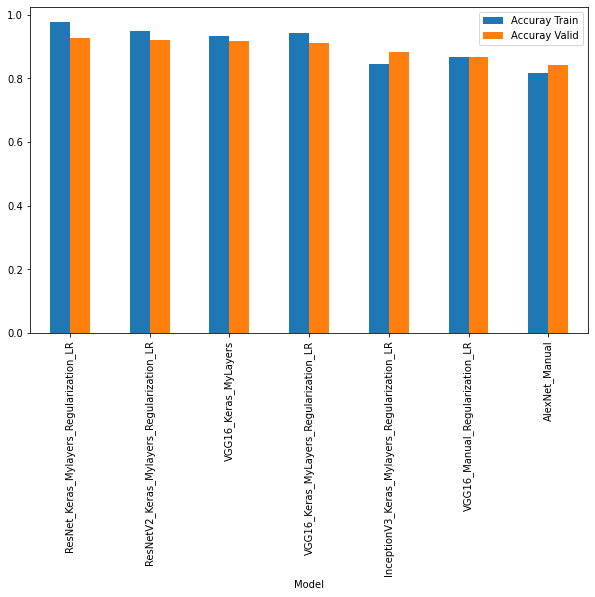

In [ ]:
acc_table.sort_values("Accuray Valid",ascending=False).plot(x="Model",
                y=["Accuray Train","Accuray Valid"],
                kind="bar",
                figsize=(10,6))

##### 7) Dense Net

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def generator_augmentation_maker():
  train_datagen = ImageDataGenerator(
                      rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=0.2,
        featurewise_center=True,
        featurewise_std_normalization=True,
        # zca_whitening=True,
        fill_mode='nearest')     # IMPORTANT
  
  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
          train_dir,  
          target_size=(150,150),  
          batch_size=32,
          class_mode='categorical')
        #   shuffle=True,
        #   seed=42,            # IMPORTANT
        #   subset='training')  # IMPORTANT

  validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150,150),
          batch_size=32,
          class_mode='categorical')
        #   shuffle=False,        # IMPORTANT
        #   seed=42,              # IMPORTANT
        #   subset='validation')  # IMPORTANT
  return train_generator, validation_generator

In [53]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def generator_augmentation_maker():
#   train_gen = ImageDataGenerator(
#         rescale=1./255,
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.3,
#         horizontal_flip=0.2,
#         featurewise_center=True,
#         featurewise_std_normalization=True,
#         # zca_whitening=True,
#         fill_mode='nearest',
#         validation_split=0.2)     # IMPORTANT

#   test_datagen = ImageDataGenerator(rescale=1./255)
#   val_gen = ImageDataGenerator(validation_split=0.2,rescale=1./255)  # IMPORTANT

#   train_generator = train_gen.flow_from_directory(
#           train_dir,  
#           target_size=(150,150),  
#           batch_size=32,
#           class_mode='categorical',
#           shuffle=True,
#           seed=42,            # IMPORTANT
#           subset='training')  # IMPORTANT

#   validation_generator = val_gen.flow_from_directory(
#           validation_dir,
#           target_size=(150,150),
#           batch_size=32,
#           class_mode='categorical',
#           shuffle=False,        # IMPORTANT
#           seed=42,              # IMPORTANT
#           subset='validation')  # IMPORTANT
#   return train_generator, validation_generator

Let's check!

In [86]:
train_generator, validation_generator = generator_augmentation_maker()

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


### Build model
First, let's defining the model!

In [87]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import ReLU
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras

In [88]:
base_model = DenseNet169(weights='imagenet',
                                   input_shape=(150, 150, 3),
                                   include_top=False)

# Freeze the base model's weights
base_model.trainable=False

In [ ]:
base_model.summary()

In [89]:
def model_maker():
  # Preprocess_input
    inputs = keras.Input(shape=(150, 150, 3))
    x = preprocess_input(inputs)
  # Connect to your base model
    x = base_model(x, training=False)
  # Add your own classifier
    # x = keras.layers.Activation('relu')
    # x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(4096, activation='relu',kernel_initializer="he_normal", kernel_regularizer = regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(2048, activation='relu',kernel_initializer="he_normal", kernel_regularizer = regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(512, activation='relu',kernel_initializer="he_normal", kernel_regularizer = regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(256, activation='relu',kernel_initializer="he_normal", kernel_regularizer = regularizers.l2(0.001))(x)
    x = keras.layers.BatchNormalization()(x)
    outputs = keras.layers.Dense(6, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model

In [90]:
model = model_maker()
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 tf.math.truediv_10 (TFOpLam  (None, 150, 150, 3)      0         
 bda)                                                            
                                                                 
 tf.nn.bias_add_5 (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 tf.math.truediv_11 (TFOpLam  (None, 150, 150, 3)      0         
 bda)                                                            
                                                                 
 densenet169 (Functional)    (None, 4, 4, 1664)        12642880  
                                                           

In [91]:
checkpoint_callback_7 = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Week8/Day4/my_model_checkpoint_7.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      verbose=1)

In [92]:
earlystopping_callback_my_7 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-2, # "improving" threshold
    patience=10, # Down to 5 from 10
    restore_best_weights=True,
    verbose=1)

In [93]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy']
)

In [94]:
ReduceLROnPlateau_callback_7 = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=20,
    mode='auto',
    #min_delta=1e-2,
    min_lr=0.00001,
    verbose=1)

### Train

Let's train model for 20 epochs! It will take about 5min with GPU.

In [95]:
init_epochs = 5

callbacks = [checkpoint_callback_7,earlystopping_callback_my_7,ReduceLROnPlateau_callback_7]

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=init_epochs,
                    callbacks = callbacks)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
439/439 [==============================] - ETA: 0s - loss: 5.0283 - accuracy: 0.4727
Epoch 00001: val_loss improved from inf to 2.88400, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week8/Day4/my_model_checkpoint_7.h5
439/439 [==============================] - 130s 271ms/step - loss: 5.0283 - accuracy: 0.4727 - val_loss: 2.8840 - val_accuracy: 0.5063 - lr: 0.0010
Epoch 2/5
439/439 [==============================] - ETA: 0s - loss: 2.2015 - accuracy: 0.5111
Epoch 00002: val_loss improved from 2.88400 to 1.60780, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week8/Day4/my_model_checkpoint_7.h5
439/439 [==============================] - 121s 275ms/step - loss: 2.2015 - accuracy: 0.5111 - val_loss: 1.6078 - val_accuracy: 0.5937 - lr: 0.0010
Epoch 3/5
439/439 [==============================] - ETA: 0s - loss: 1.6835 - accuracy: 0.5112
Epoch 00003: val_loss improved from 1.60780 to 1.54404, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week8/Day4/my_m

In [ ]:
model.evaluate(validation_generator)

23/23 [==============================] - 2s 103ms/step - loss: 2.5769 - accuracy: 0.8755


[2.576878547668457, 0.8755130171775818]

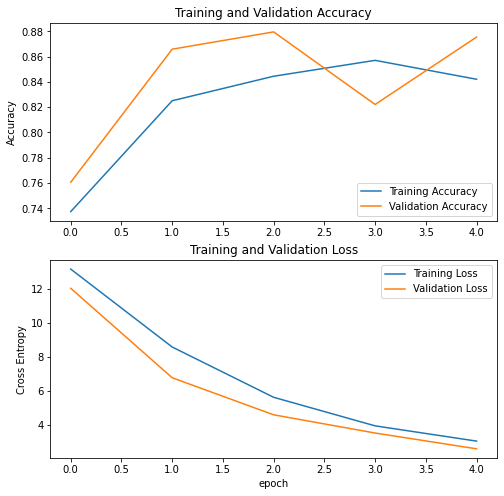

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.ylim([0,1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Fine-tuning

Finally, let's unfreeze the last few more layers and train with a low learning rate.

In [96]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  595


In [98]:
# Unfreeze the base_model.
base_model.trainable = True

# Fine-tune from layer 150
fine_tune_at = 150

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 tf.math.truediv_10 (TFOpLam  (None, 150, 150, 3)      0         
 bda)                                                            
                                                                 
 tf.nn.bias_add_5 (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 tf.math.truediv_11 (TFOpLam  (None, 150, 150, 3)      0         
 bda)                                                            
                                                                 
 densenet169 (Functional)    (None, 4, 4, 1664)        12642880  
                                                           

In [99]:
earlystopping_callback_my_1 = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0, # "improving" threshold
    patience=20, # Down to 5 from 10
    restore_best_weights=True,
    verbose=1)

In [100]:
ReduceLROnPlateau_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=20,
    mode='auto',
    #min_delta=1e-2,
    min_lr=0.00001,
    verbose=1)

Now let's fine tune for another 15 epochs!

In [103]:
init_epochs = 5
fine_tune_epochs = 15
total_epochs = init_epochs + fine_tune_epochs

# YOUR CALLBACKS
callbacks = [checkpoint_callback_7,earlystopping_callback_my_7,ReduceLROnPlateau_callback_7]

history_fine = model.fit(train_generator, 
                         validation_data=validation_generator,
                         epochs=total_epochs,
                         initial_epoch=init_epochs,
                         callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 6/20
439/439 [==============================] - ETA: 0s - loss: 1.3757 - accuracy: 0.5500
Epoch 00006: val_loss improved from 1.42014 to 1.41622, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week8/Day4/my_model_checkpoint_7.h5
439/439 [==============================] - 148s 293ms/step - loss: 1.3757 - accuracy: 0.5500 - val_loss: 1.4162 - val_accuracy: 0.5467 - lr: 1.0000e-05
Epoch 7/20
439/439 [==============================] - ETA: 0s - loss: 1.2397 - accuracy: 0.6015
Epoch 00007: val_loss improved from 1.41622 to 1.13148, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Week8/Day4/my_model_checkpoint_7.h5
439/439 [==============================] - 127s 288ms/step - loss: 1.2397 - accuracy: 0.6015 - val_loss: 1.1315 - val_accuracy: 0.6413 - lr: 1.0000e-05
Epoch 8/20
439/439 [==============================] - ETA: 0s - loss: 1.1593 - accuracy: 0.6319
Epoch 00008: val_loss did not improve from 1.13148
439/439 [==============================] - 98s 224ms/step - l

Let's check 

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

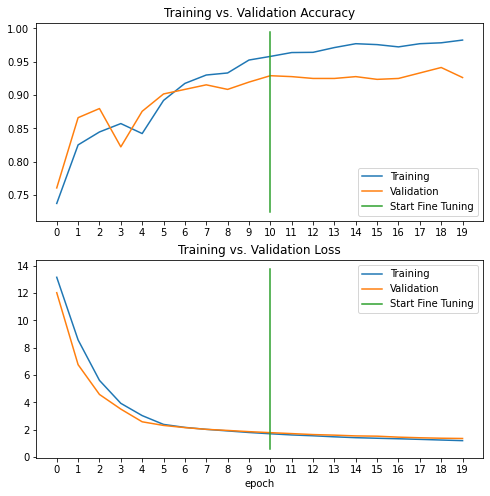

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0.9, 1])
plt.plot([init_epochs,init_epochs],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training vs. Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.xticks(range(total_epochs))
# plt.ylim([0, 0.5])
plt.plot([init_epochs,init_epochs],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training vs. Validation Loss')
plt.xlabel('epoch')
plt.show()

### Predict a real image

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is.

In [ ]:
# UPLOAD A PHOTO and PREDICT
# from google.colab import files

# uploaded = files.upload()
# for fn in uploaded.keys():
#   print(fn)
#   img_path = './' + fn

In [ ]:
TEST_SET = current_path/'content'

In [ ]:
img_path = TEST_SET

In [ ]:
list(TEST_SET.glob('*'))

[]

In [ ]:
for item in TEST_SET.glob('*'):
  print(str(item))
  if item.name.startswith('README'):
    print('YEAHH!')

In [ ]:
random.choice(list(glob.glob('/content/seg_pred/seg_pred/*')))

'/content/seg_pred/seg_pred/20790.jpg'

In [ ]:
# OR CHOOSE A RANDOM PHOTO FROM PREDICTION FOLDER
from google.colab import files
from numpy import random
# TEST_SET = '/content/seg_pred/seg_pred'
img_path = random.choice(list(glob.glob('/content/seg_pred/seg_pred/*')))
img_path

'/content/seg_pred/seg_pred/10768.jpg'

In [ ]:
from keras.preprocessing import image

img        = image.load_img(img_path, target_size=(150, 150))
img_array  = image.img_to_array(img)
img_array  = np.expand_dims(img_array, axis=0)
img_array = img_array/255.

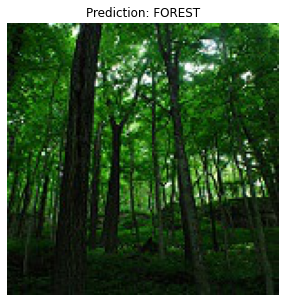

In [ ]:
prediction = restored_model_3c.predict(img_array)

for key, value in validation_generator_my_3c.class_indices.items():
  if value == prediction[0].argmax():
    pred = key

plt.figure(figsize=(5,5))
img = mpimg.imread(img_path)
plt.imshow(img)
plt.title('Prediction: ' + pred.upper())
plt.axis('off')
plt.grid(b=None)
plt.show()

In [ ]:
# Extract Feature
model_my_3b_extract = VGG16(weights='imagenet',include_top=False)

In [ ]:
# Get Random Image
img_path_1 = random.choice(list(glob.glob('/content/seg_pred/seg_pred/*')))

In [ ]:
# Image
Image_1 = image.load_img(img_path_1,target_size=(150,150))

In [ ]:
x_1 = image.img_to_array(Image_1)

In [ ]:
x_1 = np.expand_dims(x_1, axis=0)

In [ ]:
x_1 = preprocess_input(x_1)

In [ ]:
feature_model_3b = model_my_3b_extract.predict(x_1)

In [ ]:
print(feature_model_3b.shape)
print(feature_model_3b)

(1, 4, 4, 512)
[[[[ 0.        0.        0.       ...  0.        0.        0.      ]
   [ 0.        0.        0.       ...  0.        0.        0.      ]
   [ 0.        0.        0.       ...  0.        0.        0.      ]
   [ 0.        0.        0.       ...  0.        0.        0.      ]]

  [[ 0.        0.        0.       ...  0.       28.679882  0.      ]
   [ 0.        0.        0.       ...  0.       16.144678  0.      ]
   [ 0.        0.        0.       ...  0.       27.556751  0.      ]
   [ 0.        0.        0.       ...  0.       45.250465  0.      ]]

  [[ 0.        0.        0.       ...  0.       34.51325   0.      ]
   [ 0.        0.        0.       ...  0.       14.745917  0.      ]
   [ 0.        0.        0.       ...  0.       16.62885   0.      ]
   [ 0.        0.        0.       ...  0.       26.863422  0.      ]]

  [[ 0.        0.        0.       ...  0.        0.        0.      ]
   [ 0.        0.        0.       ...  0.        0.        0.      ]
   [ 0.      